In [5]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'cv2'

## Part 1

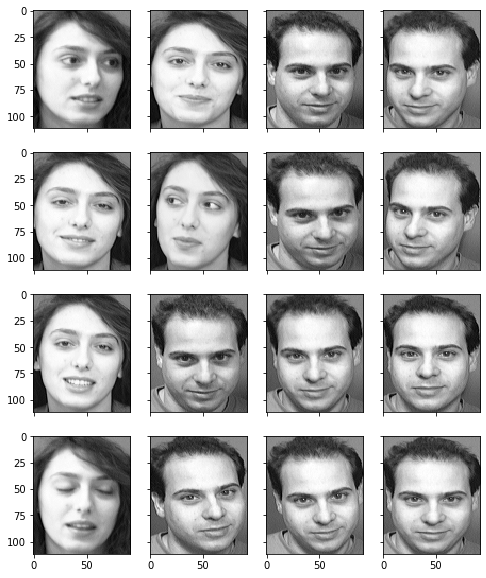

In [47]:
faces = {}
with zipfile.ZipFile("face_data.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [48]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400


## Part 2

In [49]:
train_facematrix = []
train_facelabel = []

test_facematrix = []
test_facelabel = []

for key,val in faces.items():
    if key.split('/')[1] == "10.pgm":
        test_facematrix.append(val.flatten())
        test_facelabel.append(key.split("/")[0])
    else:
        train_facematrix.append(val.flatten())
        train_facelabel.append(key.split("/")[0])

# Create a NxM matrix with N images and M pixels per image
train_facematrix = np.array(train_facematrix)
test_facematrix = np.array(test_facematrix)

print('Number of images in Train set: ', train_facematrix.shape[0])
print('Number of images in Test set: ', test_facematrix.shape[0])

Number of images in Train set:  360
Number of images in Test set:  40


## Part 3

In [1]:
pca = PCA().fit(train_facematrix)

n_components = 20
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
    
print("Showing the eigenfaces")
plt.show()

NameError: name 'PCA' is not defined

## Part 4

In [51]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (train_facematrix - pca.mean_).T

s1 Best match s1 with Euclidean distance 2282.220951


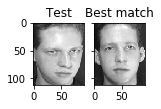

s2 Best match s38 with Euclidean distance 2653.692581


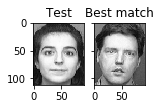

s3 Best match s11 with Euclidean distance 1103.366267


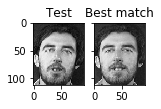

s4 Best match s12 with Euclidean distance 753.341841


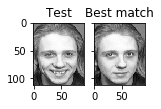

s5 Best match s13 with Euclidean distance 354.398996


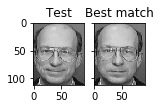

s6 Best match s14 with Euclidean distance 1623.065548


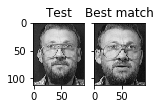

s7 Best match s15 with Euclidean distance 627.126717


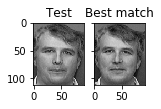

s8 Best match s16 with Euclidean distance 1539.666811


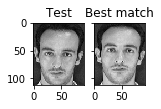

s9 Best match s17 with Euclidean distance 853.791818


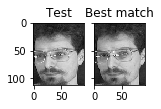

s10 Best match s18 with Euclidean distance 1293.499325


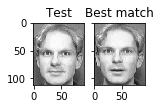

s11 Best match s19 with Euclidean distance 1100.271174


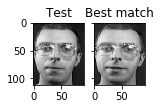

s12 Best match s2 with Euclidean distance 775.910479


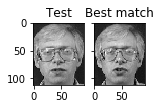

s13 Best match s20 with Euclidean distance 623.343734


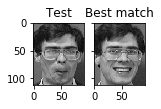

s14 Best match s21 with Euclidean distance 787.021793


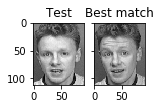

s15 Best match s22 with Euclidean distance 748.855094


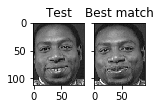

s16 Best match s23 with Euclidean distance 979.891411


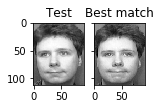

s17 Best match s24 with Euclidean distance 929.654514


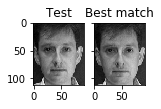

s18 Best match s25 with Euclidean distance 786.626014


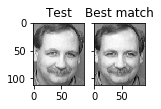

s19 Best match s26 with Euclidean distance 409.266701


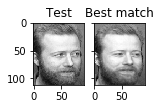

s20 Best match s27 with Euclidean distance 1361.351846


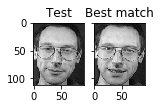

s21 Best match s28 with Euclidean distance 1392.223969


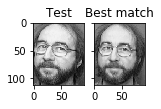

s22 Best match s29 with Euclidean distance 1163.557055


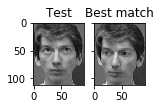

s23 Best match s3 with Euclidean distance 802.707948


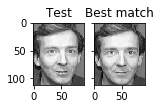

s24 Best match s30 with Euclidean distance 855.271576


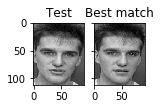

s25 Best match s31 with Euclidean distance 800.667076


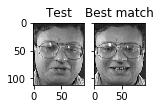

s26 Best match s32 with Euclidean distance 570.863503


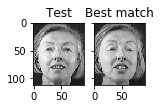

s27 Best match s33 with Euclidean distance 238.418206


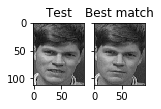

s28 Best match s34 with Euclidean distance 255.295632


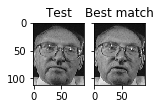

s29 Best match s35 with Euclidean distance 1834.534051


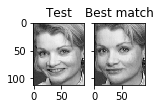

s30 Best match s36 with Euclidean distance 1626.881259


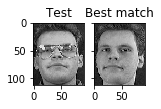

s31 Best match s37 with Euclidean distance 738.498466


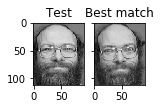

s32 Best match s38 with Euclidean distance 775.893912


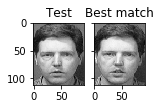

s33 Best match s39 with Euclidean distance 1214.882789


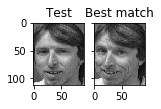

s34 Best match s4 with Euclidean distance 1136.490214


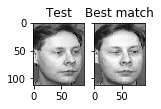

s35 Best match s40 with Euclidean distance 1254.568606


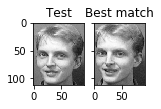

s36 Best match s40 with Euclidean distance 1446.836815


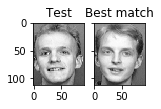

s37 Best match s6 with Euclidean distance 462.442981


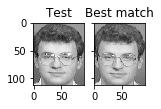

s38 Best match s7 with Euclidean distance 1204.568337


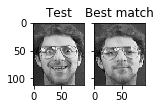

s39 Best match s8 with Euclidean distance 1074.229284


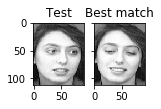

s40 Best match s9 with Euclidean distance 1105.093245


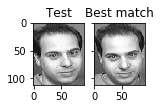

Accuracy:  0.95
Explained Variance Ratio for 20 principal components: 0.7026601755765047


In [52]:
accuracy = 0
for i in range(test_facematrix.shape[0]):
    test_face = test_facematrix[i].reshape(1,-1)
    test_label = test_facelabel[i]
    
    test_weight = eigenfaces @ (test_face - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - test_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    
    if test_label == train_facelabel[best_match]:
        accuracy += 1
    
    print("%s Best match %s with Euclidean distance %f" % ('s'+str(i+1), train_facelabel[best_match], euclidean_distance[best_match]))
    
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(2,4))
    axes[0].imshow(test_face.reshape(faceshape), cmap="gray")
    axes[0].set_title("Test")
    axes[1].imshow(train_facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()
    
print('Accuracy: ', accuracy/test_facematrix.shape[0])
print(f"Explained Variance Ratio for {n_components} principal components: {sum(pca.explained_variance_ratio_[:n_components])}")

## Part 5

Showing the eigenfaces


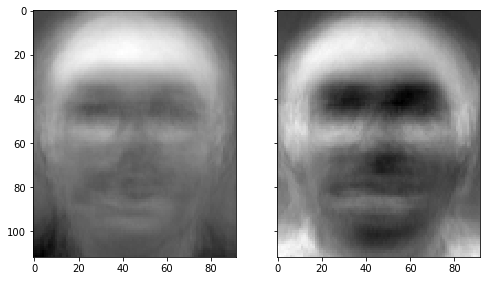

In [53]:
pca = PCA().fit(train_facematrix)

n_components = 2
eigenfaces = pca.components_[:n_components]

# Show the first 2 eigenfaces
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,5))
for i in range(2):
    axes[i%2].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
    
print("Showing the eigenfaces")
plt.show()

s1 Best match s1 with Euclidean distance 229.210176


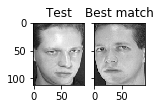

s2 Best match s7 with Euclidean distance 394.717480


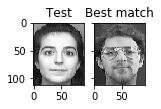

s3 Best match s11 with Euclidean distance 263.888872


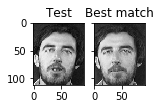

s4 Best match s12 with Euclidean distance 59.814632


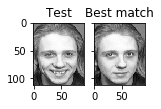

s5 Best match s13 with Euclidean distance 81.294123


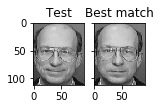

s6 Best match s14 with Euclidean distance 649.758694


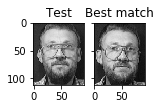

s7 Best match s15 with Euclidean distance 138.485751


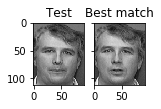

s8 Best match s3 with Euclidean distance 168.363848


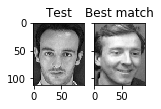

s9 Best match s17 with Euclidean distance 96.716198


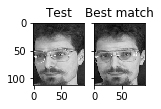

s10 Best match s18 with Euclidean distance 264.212782


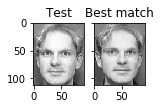

s11 Best match s28 with Euclidean distance 170.775053


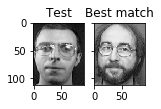

s12 Best match s25 with Euclidean distance 42.933602


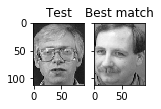

s13 Best match s20 with Euclidean distance 217.469444


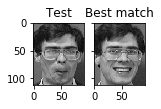

s14 Best match s21 with Euclidean distance 172.358494


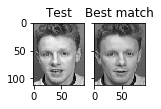

s15 Best match s22 with Euclidean distance 270.942344


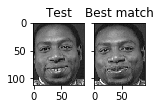

s16 Best match s17 with Euclidean distance 61.217220


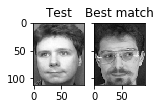

s17 Best match s24 with Euclidean distance 298.576129


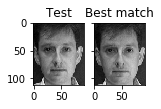

s18 Best match s40 with Euclidean distance 93.793918


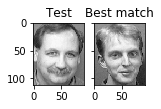

s19 Best match s26 with Euclidean distance 89.534580


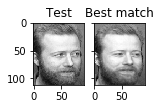

s20 Best match s28 with Euclidean distance 80.995074


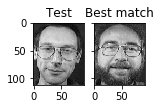

s21 Best match s19 with Euclidean distance 166.804383


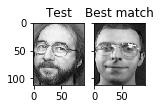

s22 Best match s39 with Euclidean distance 66.245288


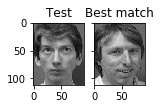

s23 Best match s8 with Euclidean distance 56.080752


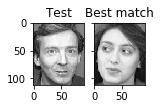

s24 Best match s30 with Euclidean distance 100.536791


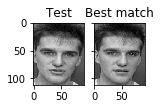

s25 Best match s31 with Euclidean distance 80.474308


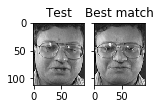

s26 Best match s26 with Euclidean distance 113.947638


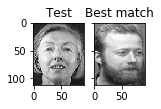

s27 Best match s33 with Euclidean distance 35.707824


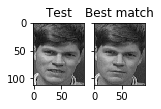

s28 Best match s34 with Euclidean distance 58.654456


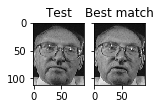

s29 Best match s25 with Euclidean distance 71.855193


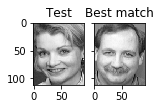

s30 Best match s32 with Euclidean distance 141.069053


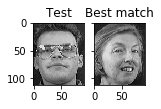

s31 Best match s37 with Euclidean distance 127.168958


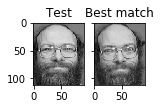

s32 Best match s38 with Euclidean distance 113.763987


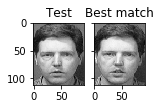

s33 Best match s39 with Euclidean distance 133.237357


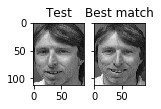

s34 Best match s7 with Euclidean distance 237.765878


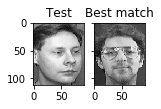

s35 Best match s17 with Euclidean distance 219.255812


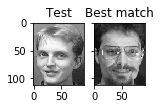

s36 Best match s5 with Euclidean distance 196.873425


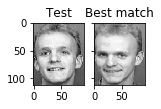

s37 Best match s6 with Euclidean distance 80.375294


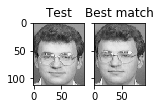

s38 Best match s3 with Euclidean distance 33.694891


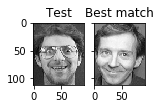

s39 Best match s8 with Euclidean distance 76.784575


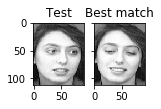

s40 Best match s7 with Euclidean distance 57.114849


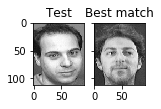

Accuracy:  0.575
Explained Variance Ratio for 2 principal components: 0.3058112331450038


In [54]:
weights = eigenfaces @ (train_facematrix - pca.mean_).T

accuracy = 0
for i in range(test_facematrix.shape[0]):
    test_face = test_facematrix[i].reshape(1,-1)
    test_label = test_facelabel[i]
    
    test_weight = eigenfaces @ (test_face - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - test_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    
    if test_label == train_facelabel[best_match]:
        accuracy += 1
    
    print("%s Best match %s with Euclidean distance %f" % ('s'+str(i+1), train_facelabel[best_match], euclidean_distance[best_match]))
    
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(2,4))
    axes[0].imshow(test_face.reshape(faceshape), cmap="gray")
    axes[0].set_title("Test")
    axes[1].imshow(train_facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()
    
print('Accuracy: ', accuracy/test_facematrix.shape[0])
print(f"Explained Variance Ratio for {n_components} principal components: {sum(pca.explained_variance_ratio_[:n_components])}")

We can see that the explained variance ratio by first 20 principal components is 70%, whereas, explained variance ratio by first 2 principal components is 30%. This explains the lower accuracy by using only 2 eigenfaces. 